In [1]:
from datasets import load_dataset, DownloadMode

# First, download the dataset with caching
def download_starcoderdata_rust(save_directory, split="train", download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS):
    try:
        ds = load_dataset(
            "bigcode/starcoderdata",
            data_dir="rust",
            split=split,
            cache_dir=save_directory,
            download_mode=download_mode,
        )

        # Save the dataset properly for later reloading
        output_path = f"{save_directory}/rust_{split}_dataset"
        ds.save_to_disk(output_path)

        print(f"Dataset 'bigcode/starcoderdata' (RUST, {split}) successfully downloaded and saved to '{output_path}'.")
        return ds

    except Exception as e:
        print(f"Error downloading dataset 'bigcode/starcoderdata' (RUST, {split}): {e}")
        return None

In [2]:
ds = download_starcoderdata_rust(save_directory="./", split="train")

Loading dataset shards:   0%|          | 0/19 [00:00<?, ?it/s]

Saving the dataset (0/19 shards):   0%|          | 0/1380468 [00:00<?, ? examples/s]

Dataset 'bigcode/starcoderdata' (RUST, train) successfully downloaded and saved to './/rust_train_dataset'.


In [3]:
from datasets import load_from_disk

# Later, load the dataset from the saved location
dataset = load_from_disk("./rust_train_dataset")

Loading dataset from disk:   0%|          | 0/19 [00:00<?, ?it/s]

In [4]:
dataset

Dataset({
    features: ['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id', 'content'],
    num_rows: 1380468
})

In [5]:
type(dataset)

datasets.arrow_dataset.Dataset

In [6]:
print(dataset[0])

{'max_stars_repo_path': 'src/interactive/widgets/main.rs', 'max_stars_repo_name': 'tranzystorek-io/dua-cli', 'max_stars_count': 1333, 'id': '0', 'content': "<reponame>tranzystorek-io/dua-cli\nuse crate::interactive::{\n    widgets::{\n        Entries, EntriesProps, Footer, FooterProps, Header, HelpPane, HelpPaneProps, MarkPane,\n        MarkPaneProps, COLOR_MARKED,\n    },\n    AppState, DisplayOptions, FocussedPane,\n};\nuse dua::traverse::Traversal;\nuse std::borrow::Borrow;\nuse tui::{\n    buffer::Buffer,\n    layout::{Constraint, Direction, Layout, Rect},\n    style::Modifier,\n    style::{Color, Style},\n};\nuse Constraint::*;\nuse FocussedPane::*;\n\npub struct MainWindowProps<'a> {\n    pub traversal: &'a Traversal,\n    pub display: DisplayOptions,\n    pub state: &'a AppState,\n}\n\n#[derive(Default)]\npub struct MainWindow {\n    pub help_pane: Option<HelpPane>,\n    pub entries_pane: Entries,\n    pub mark_pane: Option<MarkPane>,\n}\n\nimpl MainWindow {\n    pub fn render<'

In [7]:
dataset = dataset.sort(column_names=["max_stars_count", "max_stars_repo_name"], reverse=[True, False])

In [8]:
# Print the first 10 examples
for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print("\n")
    else:
        break

Example 0:
use assert_cmd::prelude::*;
use dir_diff;
use std::process::Command;
use tempdir;
use tempdir::TempDir;

#[test]
fn test_go_help() {
    let path = if cfg!(targe_os = "windows") {
        "../gen-license-go/bin/windows/gen-license-go.exe"
    } else if cfg!(target_os = "linux") {
        "../gen-license-go/bin/linux/gen-license-go"
    } else {
        "../gen-license-go/bin/osx/gen-license-go"
    };
    let mut cmd = Command::new(&path);
    cmd.arg("-h");
    // assert_eq!(output, help);
    let assert = cmd.assert();
    assert.success().stdout(
        r#"gen-license-go is a 996.icu license generator implemented in Go,
this generator is developed to generate various open-source licenses including MIT, Apache, etc.
More importantly, the main purpose of this tool is to incorporate those aforesaid licenses into
a brand new license: 996.icu, defined by this repository.

Usage:
  gen-license-go [flags]
  gen-license-go [command]

Available Commands:
  gen         gen is a 99

In [9]:
from datasets import Dataset

def calculate_avg_line_length(example):
    lines = example['content'].split('\n')
    avg_length = sum(len(line) for line in lines) / len(lines)
    example['avg_line_length'] = avg_length
    return example

dataset = dataset.map(calculate_avg_line_length)

for i, example in enumerate(dataset):
    if i < 10:
        print(f"Example {i}:")
        print(example['content'])
        print(f"Average Line Length: {example['avg_line_length']}\n")
    else:
        break

Map:   0%|          | 0/1380468 [00:00<?, ? examples/s]

Example 0:
use assert_cmd::prelude::*;
use dir_diff;
use std::process::Command;
use tempdir;
use tempdir::TempDir;

#[test]
fn test_go_help() {
    let path = if cfg!(targe_os = "windows") {
        "../gen-license-go/bin/windows/gen-license-go.exe"
    } else if cfg!(target_os = "linux") {
        "../gen-license-go/bin/linux/gen-license-go"
    } else {
        "../gen-license-go/bin/osx/gen-license-go"
    };
    let mut cmd = Command::new(&path);
    cmd.arg("-h");
    // assert_eq!(output, help);
    let assert = cmd.assert();
    assert.success().stdout(
        r#"gen-license-go is a 996.icu license generator implemented in Go,
this generator is developed to generate various open-source licenses including MIT, Apache, etc.
More importantly, the main purpose of this tool is to incorporate those aforesaid licenses into
a brand new license: 996.icu, defined by this repository.

Usage:
  gen-license-go [flags]
  gen-license-go [command]

Available Commands:
  gen         gen is a 99

In [10]:
sliced_dataset = dataset[:2500000]

In [11]:
import pandas as pd

df = pd.DataFrame(sliced_dataset)

In [12]:
avg_line_length_stats = df['avg_line_length'].describe()
print("Statistics for avg_line_length:")
print(avg_line_length_stats)

Statistics for avg_line_length:
count    1.380468e+06
mean     2.789903e+01
std      8.248521e+00
min      8.181818e-01
25%      2.310714e+01
50%      2.766667e+01
75%      3.203448e+01
max      9.911111e+01
Name: avg_line_length, dtype: float64


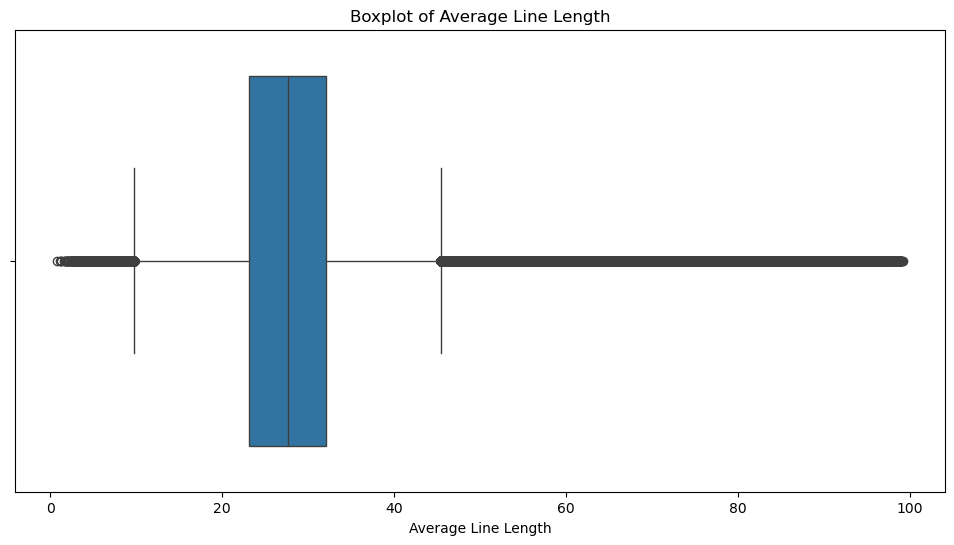

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['avg_line_length'])
plt.title('Boxplot of Average Line Length')
plt.xlabel('Average Line Length')
plt.show()

In [14]:
Q1 = df['avg_line_length'].quantile(0.25)
Q3 = df['avg_line_length'].quantile(0.75)
IQR = Q3 - Q1

In [15]:
outliers = df[(df['avg_line_length'] < (Q1 - 1.5 * IQR)) | (df['avg_line_length'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 38662


In [16]:
outliers['avg_line_length'].describe()

count    38662.000000
mean        46.624153
std         23.437039
min          0.818182
25%         45.703878
50%         49.580079
75%         59.387113
max         99.111111
Name: avg_line_length, dtype: float64

In [17]:
df.drop(outliers.index, inplace=True)

In [18]:
df['avg_line_length'].describe()

count    1.341806e+06
mean     2.735949e+01
std      6.616487e+00
min      9.722222e+00
25%      2.309091e+01
50%      2.753846e+01
75%      3.173529e+01
max      4.542500e+01
Name: avg_line_length, dtype: float64

In [19]:
import numpy as np

np.percentile(df['avg_line_length'], 80)

32.78846153846154

In [20]:
df['line_count'] = df['content'].apply(lambda x: len(x.split('\n')))
df['line_count'].describe()

count    1.341806e+06
mean     1.903655e+02
std      5.640785e+02
min      1.000000e+00
25%      3.400000e+01
50%      8.200000e+01
75%      1.910000e+02
max      6.538000e+04
Name: line_count, dtype: float64

In [21]:
count_range_dict = {
    "0-100": 0,
    "101-200": 0,
    "201-300": 0,
    "301-400": 0,
    "401-500": 0,
    "501-600": 0,
    "601-700": 0,
    "701-800": 0,
    "801-900": 0,
    "901-1000": 0,
    "1000+": 0
}

for count in df['line_count']:
    if count <= 100:
        count_range_dict["0-100"] += 1
    elif count <= 200:
        count_range_dict["101-200"] += 1
    elif count <= 300:
        count_range_dict["201-300"] += 1
    elif count <= 400:
        count_range_dict["301-400"] += 1
    elif count <= 500:
        count_range_dict["401-500"] += 1
    elif count <= 600:
        count_range_dict["501-600"] += 1
    elif count <= 700:
        count_range_dict["601-700"] += 1
    elif count <= 800:
        count_range_dict["701-800"] += 1
    elif count <= 900:
        count_range_dict["801-900"] += 1
    elif count <= 1000:
        count_range_dict["901-1000"] += 1
    else:
        count_range_dict["1000+"] += 1

In [22]:
for key, value in count_range_dict.items():
    print(f"Number of examples with line count in range {key}: {value}")

Number of examples with line count in range 0-100: 755050
Number of examples with line count in range 101-200: 267796
Number of examples with line count in range 201-300: 118717
Number of examples with line count in range 301-400: 63923
Number of examples with line count in range 401-500: 38315
Number of examples with line count in range 501-600: 24662
Number of examples with line count in range 601-700: 16792
Number of examples with line count in range 701-800: 11482
Number of examples with line count in range 801-900: 8420
Number of examples with line count in range 901-1000: 6344
Number of examples with line count in range 1000+: 30305


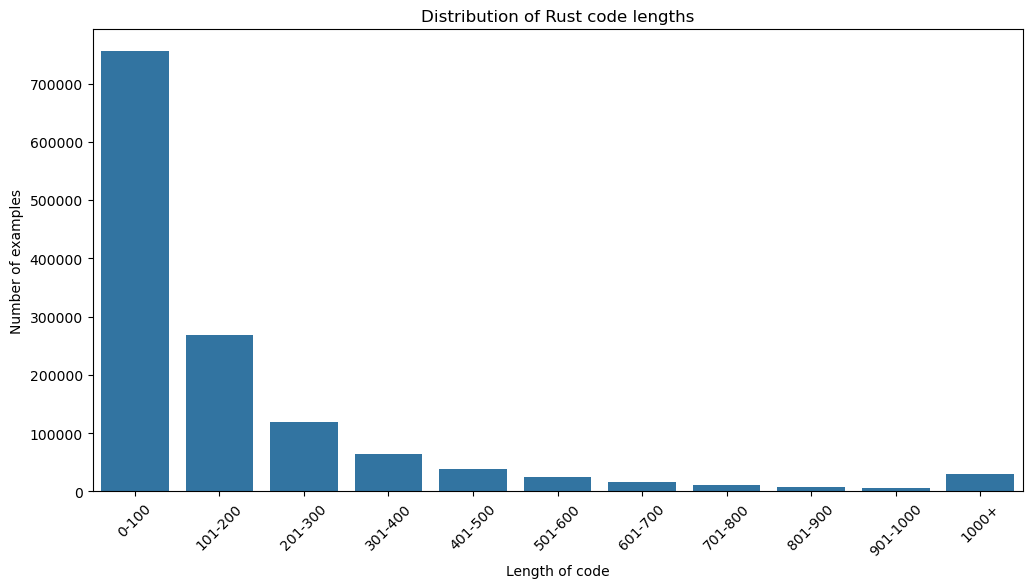

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=list(count_range_dict.keys()), y=list(count_range_dict.values()))
plt.title("Distribution of Rust code lengths")
plt.xlabel("Length of code")
plt.ylabel("Number of examples")
plt.xticks(rotation=45)
plt.show()

In [24]:
df_line = pd.DataFrame(list(count_range_dict.items()), columns=["Length", "Count"])
df_line["Cumulative Count"] = df_line["Count"].cumsum()
df_line["Percentage"] = df_line["Count"] / df_line["Count"].sum() * 100
df_line["Cumulative Percentage"] = df_line["Percentage"].cumsum()
df_line.head(11)

,Length,Count,Cumulative Count,Percentage,Cumulative Percentage
0,0-100,755050,755050,56.271175,56.271175
1,101-200,267796,1022846,19.957878,76.229052
2,201-300,118717,1141563,8.847553,85.076606
3,301-400,63923,1205486,4.763952,89.840558
4,401-500,38315,1243801,2.855480,92.696038
5,501-600,24662,1268463,1.837971,94.534009
6,601-700,16792,1285255,1.251448,95.785456
7,701-800,11482,1296737,0.855712,96.641169
8,801-900,8420,1305157,0.627512,97.268681
9,901-1000,6344,1311501,0.472796,97.741477


In [25]:
np.percentile(df['line_count'], 90)

405.0

In [26]:
df.columns

Index(['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id',
       'content', 'avg_line_length', 'line_count'],
      dtype='object')

In [27]:
df_filtered = df.drop(columns=['max_stars_repo_path', 'max_stars_repo_name', 'max_stars_count', 'id'], axis=1)
df_filtered.head()

,content,avg_line_length,line_count
0,use assert_cmd::prelude::*;\nuse dir_diff;\nus...,31.518072,249
1,<reponame>luyouli/996.ICU<filename>archived/li...,37.838710,124
2,<filename>archived/licenses[WIP]/tools/test-ge...,27.619048,42
4,// run-pass\n// edition:2021\n// compile-flags...,27.752273,880
5,<filename>src/test/ui/associated-consts/associ...,14.076923,13


In [28]:
df_filtered.shape

(1341806, 3)

In [29]:
df_filtered = df_filtered[df_filtered['line_count'] <= 405]
df_filtered.shape

(1207820, 3)

In [30]:
df_filtered = df_filtered[df_filtered['avg_line_length'] <= 33]
df_filtered.shape

(1010334, 3)

In [31]:
df_filtered.head()

,content,avg_line_length,line_count
0,use assert_cmd::prelude::*;\nuse dir_diff;\nus...,31.518072,249
2,<filename>archived/licenses[WIP]/tools/test-ge...,27.619048,42
5,<filename>src/test/ui/associated-consts/associ...,14.076923,13
6,<filename>src/test/run-make-fulldeps/extern-ov...,17.142857,7
7,<reponame>Eric-Arellano/rust<filename>src/test...,28.333333,9


In [32]:
print(df[["avg_line_length", "line_count"]].describe())
print()
print(df_filtered.describe())

       avg_line_length    line_count
count     1.341806e+06  1.341806e+06
mean      2.735949e+01  1.903655e+02
std       6.616487e+00  5.640785e+02
min       9.722222e+00  1.000000e+00
25%       2.309091e+01  3.400000e+01
50%       2.753846e+01  8.200000e+01
75%       3.173529e+01  1.910000e+02
max       4.542500e+01  6.538000e+04

       avg_line_length    line_count
count     1.010334e+06  1.010334e+06
mean      2.489533e+01  9.301160e+01
std       5.190227e+00  8.837893e+01
min       9.722222e+00  1.000000e+00
25%       2.162500e+01  2.700000e+01
50%       2.567568e+01  6.300000e+01
75%       2.896667e+01  1.310000e+02
max       3.300000e+01  4.050000e+02


In [33]:
data_dict_rust = {}

for i, example in enumerate(df_filtered["content"]):
    data_dict_rust[f"rust_{i}"] = example

In [34]:
assert len(data_dict_rust) == len(df_filtered), "Data dictionary length does not match the number of examples in the dataset."

In [35]:
for i, (k,v) in enumerate(data_dict_rust.items()):
    if i < 5:
        print(f"Example {k}:")
        print(v)
        print("\n")
    else:
        break

Example rust_0:
use assert_cmd::prelude::*;
use dir_diff;
use std::process::Command;
use tempdir;
use tempdir::TempDir;

#[test]
fn test_go_help() {
    let path = if cfg!(targe_os = "windows") {
        "../gen-license-go/bin/windows/gen-license-go.exe"
    } else if cfg!(target_os = "linux") {
        "../gen-license-go/bin/linux/gen-license-go"
    } else {
        "../gen-license-go/bin/osx/gen-license-go"
    };
    let mut cmd = Command::new(&path);
    cmd.arg("-h");
    // assert_eq!(output, help);
    let assert = cmd.assert();
    assert.success().stdout(
        r#"gen-license-go is a 996.icu license generator implemented in Go,
this generator is developed to generate various open-source licenses including MIT, Apache, etc.
More importantly, the main purpose of this tool is to incorporate those aforesaid licenses into
a brand new license: 996.icu, defined by this repository.

Usage:
  gen-license-go [flags]
  gen-license-go [command]

Available Commands:
  gen         gen is

In [36]:
import json

with open('rust_train.json', 'w') as f:
    json.dump(data_dict_rust, f)
    print("Saved to 'rust_train.json'")

Saved to 'rust_train.json'
